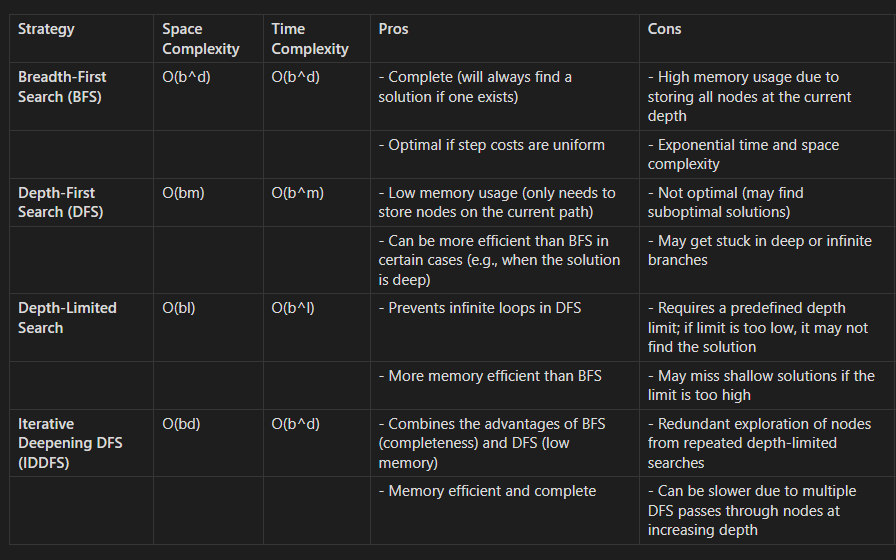

### Path (solution) searching using BFS

In [1]:
from collections import deque

def bfs(start_node,target_node,graph):
    queue = deque([start_node])
    visited = set([start_node])
    parent = {start_node : None}

    print("Starting BFS traversal")
    print("----------------------")

    step = 0
    while queue:
        current_node = queue.popleft()
        step += 1
        print(f"Step {step}: Visited node {current_node}")

        if current_node == target_node:
            path = []
            while current_node is not None:
                path.append(current_node)
                current_node = parent[current_node]
            path.reverse()
            return path
        
        for neighbor in graph[current_node]:
            if neighbor not in visited:
                visited.add(neighbor)
                parent[neighbor] = current_node
                queue.append(neighbor)
    return None

graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F', 'G'],
    'D': ['B'],
    'E': ['B','H','I'],
    'F': ['C'],
    'G': ['C','J'],
    'H': ['E', 'K', 'L'],
    'I': ['E'],
    'J': ['G'],
    'K': ['H'],
    'L': ['H']
}

start_node = 'A'
target_node = 'I'
path = bfs(start_node, target_node, graph)

if path:
    print(f"Path from {start_node} to {target_node}: {path}")
else:
    print(f"{target_node} is not reachable from {start_node}")

Starting BFS traversal
----------------------
Step 1: Visited node A
Step 2: Visited node B
Step 3: Visited node C
Step 4: Visited node D
Step 5: Visited node E
Step 6: Visited node F
Step 7: Visited node G
Step 8: Visited node H
Step 9: Visited node I
Path from A to I: ['A', 'B', 'E', 'I']


### Path (solution) searching using DFS

In [2]:
step = 0
def dfs_recursive(node, target_node, graph, visited, parent):
    global step
    step += 1
    print(f"Step {step}: Visiting node {node}")
    visited.add(node)

    if node == target_node:
        return True  

    for neighbor in graph[node]:
        if neighbor not in visited:
            parent[neighbor] = node  
            if dfs_recursive(neighbor, target_node, graph, visited, parent):
                return True  

    print(f"Bactracking from {node} to {parent[node]}")
    return False 


def dfs_find_path(start_node, target_node, graph):
    visited = set() 
    parent = {start_node: None} 

    print(f"Starting DFS traversal")
    print(f"----------------------")
    isFound = dfs_recursive(start_node, target_node, graph, visited, parent)

    if isFound:
        path = []
        current_node = target_node
        while current_node is not None:
            path.append(current_node)
            current_node = parent[current_node]
        path.reverse()
        return path

    return None


graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F', 'G'],
    'D': ['B'],
    'E': ['B', 'H', 'I'],
    'F': ['C'],
    'G': ['C', 'J'],
    'H': ['E', 'K', 'L'],
    'I': ['E'],
    'J': ['G'],
    'K': ['H'],
    'L': ['H']
}

start_node = 'A'
target_node = 'I'
path = dfs_find_path(start_node, target_node, graph)

if path:
    print(f"Path from {start_node} to {target_node}: {path}")
else:
    print(f"{target_node} is not reachable from {start_node}")

Starting DFS traversal
----------------------
Step 1: Visiting node A
Step 2: Visiting node B
Step 3: Visiting node D
Bactracking from D to B
Step 4: Visiting node E
Step 5: Visiting node H
Step 6: Visiting node K
Bactracking from K to H
Step 7: Visiting node L
Bactracking from L to H
Bactracking from H to E
Step 8: Visiting node I
Path from A to I: ['A', 'B', 'E', 'I']


### Iterative Deepenning DFS (ID-DFS)

In [3]:
def DLS(node, target, depth, path, graph, visited):
    if depth == 0:  
        return False
    if node == target:  
        path.append(node)
        return True

    visited.add(node)
    print(f"Visiting node {node}")
    for neighbor in graph[node]:
        if neighbor not in visited:
            if DLS(neighbor, target, depth - 1, path, graph, visited):
                path.append(node)
                return True

    print(f"Backtracking from {node}")
    return False

def IDDFS(start, target, max_depth, graph):
    print("Starting Iterative Deepening DFS.")
    print("---------------------------------")
    for depth in range(1, max_depth + 1):
        print(f"Depth = {depth}")
        visited = set()
        path = []
        if DLS(start, target, depth, path, graph, visited):
            return path[::-1] 
        else:
            print(f"No path found at depth {depth}")
    return None


graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F', 'G'],
    'D': ['B'],
    'E': ['B', 'H', 'I'],
    'F': ['C'],
    'G': ['C', 'J'],
    'H': ['E', 'K', 'L'],
    'I': ['E'],
    'J': ['G'],
    'K': ['H'],
    'L': ['H']
}

path = IDDFS('A', 'I', 5, graph)
print("Path from A to I:", path)


Starting Iterative Deepening DFS.
---------------------------------
Depth = 1
Visiting node A
Backtracking from A
No path found at depth 1
Depth = 2
Visiting node A
Visiting node B
Backtracking from B
Visiting node C
Backtracking from C
Backtracking from A
No path found at depth 2
Depth = 3
Visiting node A
Visiting node B
Visiting node D
Backtracking from D
Visiting node E
Backtracking from E
Backtracking from B
Visiting node C
Visiting node F
Backtracking from F
Visiting node G
Backtracking from G
Backtracking from C
Backtracking from A
No path found at depth 3
Depth = 4
Visiting node A
Visiting node B
Visiting node D
Backtracking from D
Visiting node E
Visiting node H
Backtracking from H
Path from A to I: ['A', 'B', 'E', 'I']
